In [1]:
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
%matplotlib inline


In [4]:
#I did some analysis on this before and added a column for the license class. we'll be using that data.
sebring_laps = pd.read_csv('sebring_data_with_licenses.csv', index_col = 0)
sebring_laps

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,FLAG_AT_FL,Unnamed: 26,license
0,1.0,3.0,1.0,2:03.750,0.0,NaN,41.661,0.0,41.326,0.0,...,269.6,charles milesi,NaN,LMP2,NaN,Richard Mille Racing Team,Oreca,GF,NaN,G
1,1.0,3.0,2.0,1:53.835,0.0,NaN,33.887,0.0,39.585,0.0,...,272.3,charles milesi,NaN,LMP2,NaN,Richard Mille Racing Team,Oreca,GF,NaN,G
2,1.0,3.0,3.0,1:53.408,0.0,NaN,34.080,0.0,39.336,0.0,...,272.9,charles milesi,NaN,LMP2,NaN,Richard Mille Racing Team,Oreca,GF,NaN,G
3,1.0,3.0,4.0,1:52.926,0.0,NaN,33.461,0.0,39.513,0.0,...,272.9,charles milesi,NaN,LMP2,NaN,Richard Mille Racing Team,Oreca,GF,NaN,G
4,1.0,3.0,5.0,1:52.332,2.0,NaN,33.384,0.0,39.181,2.0,...,272.3,charles milesi,NaN,LMP2,NaN,Richard Mille Racing Team,Oreca,GF,NaN,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,98.0,3.0,131.0,2:00.077,0.0,NaN,35.541,1.0,41.656,1.0,...,249.4,nicki thiim,NaN,LMGTE Am,NaN,Northwest AMR,Aston Martin,GF,NaN,P
6403,98.0,3.0,132.0,2:00.536,0.0,NaN,35.733,0.0,42.024,0.0,...,247.6,nicki thiim,NaN,LMGTE Am,NaN,Northwest AMR,Aston Martin,GF,NaN,P
6404,98.0,3.0,133.0,2:00.626,0.0,NaN,35.819,0.0,41.963,0.0,...,249.4,nicki thiim,NaN,LMGTE Am,NaN,Northwest AMR,Aston Martin,GF,NaN,P
6405,98.0,3.0,134.0,2:00.511,0.0,NaN,35.788,0.0,41.759,0.0,...,249.0,nicki thiim,NaN,LMGTE Am,NaN,Northwest AMR,Aston Martin,GF,NaN,P


In [5]:
#there's spaces we have to get rid of first in the columns in order to manipulate the data.
sebring_laps.columns

Index(['NUMBER', ' DRIVER_NUMBER', ' LAP_NUMBER', ' LAP_TIME',
       ' LAP_IMPROVEMENT', ' CROSSING_FINISH_LINE_IN_PIT', ' S1',
       ' S1_IMPROVEMENT', ' S2', ' S2_IMPROVEMENT', ' S3', ' S3_IMPROVEMENT',
       ' KPH', ' ELAPSED', ' HOUR', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE',
       'TOP_SPEED', 'DRIVER_NAME', 'PIT_TIME', 'CLASS', 'GROUP', 'TEAM',
       'MANUFACTURER', 'FLAG_AT_FL', 'Unnamed: 26', 'license'],
      dtype='object')

In [6]:
#so we can replace them to make them disappear.
sebring_laps.columns = sebring_laps.columns.str.replace(" ", "")
sebring_laps.columns

Index(['NUMBER', 'DRIVER_NUMBER', 'LAP_NUMBER', 'LAP_TIME', 'LAP_IMPROVEMENT',
       'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S1_IMPROVEMENT', 'S2',
       'S2_IMPROVEMENT', 'S3', 'S3_IMPROVEMENT', 'KPH', 'ELAPSED', 'HOUR',
       'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'TOP_SPEED', 'DRIVER_NAME',
       'PIT_TIME', 'CLASS', 'GROUP', 'TEAM', 'MANUFACTURER', 'FLAG_AT_FL',
       'Unnamed:26', 'license'],
      dtype='object')

In [7]:
#now we can take the columns we want, not necessary, but makes the data look better.
wanted_columns = ['NUMBER', 'CROSSING_FINISH_LINE_IN_PIT' ,'DRIVER_NUMBER', 'LAP_NUMBER', 'LAP_TIME', 'S1', 'S2', 'S3', 'KPH', 'CLASS', 'TEAM', 'MANUFACTURER', 'FLAG_AT_FL', "DRIVER_NAME", 'license']
sebring_laps = sebring_laps[wanted_columns]
sebring_laps

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license
0,1.0,NaN,3.0,1.0,2:03.750,41.661,41.326,40.763,175.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G
1,1.0,NaN,3.0,2.0,1:53.835,33.887,39.585,40.363,190.3,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G
2,1.0,NaN,3.0,3.0,1:53.408,34.080,39.336,39.992,191.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G
3,1.0,NaN,3.0,4.0,1:52.926,33.461,39.513,39.952,191.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G
4,1.0,NaN,3.0,5.0,1:52.332,33.384,39.181,39.767,192.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,98.0,NaN,3.0,131.0,2:00.077,35.541,41.656,42.880,180.5,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P
6403,98.0,NaN,3.0,132.0,2:00.536,35.733,42.024,42.779,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P
6404,98.0,NaN,3.0,133.0,2:00.626,35.819,41.963,42.844,179.6,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P
6405,98.0,NaN,3.0,134.0,2:00.511,35.788,41.759,42.964,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P


In [8]:
#now we can do some analysis on the lap times! but first we should convert these to ms.

#this function essentially just takes the times, which is formatted as minute:second:millisecond in mm:ss.mss format,
#and then converts it into milliseconds by splitting it and then converting it. 
def convert_to_ms(x):
    minutes, second = x.split(":")
    seconds, ms = second.split(".")
    minute_seconds = (int(minutes)*60 + int(seconds))*1000
    total_ms = minute_seconds + int(ms)
    return total_ms

#we can then apply this function to every single lap time in the df, and convert everything to ms.
sebring_laps['lap_time_ms'] = sebring_laps['LAP_TIME'].apply(convert_to_ms)

#and then let's make a seconds column to plot it neatly later.
sebring_laps['lap_time_s'] = sebring_laps['lap_time_ms']/1000
sebring_laps

C:\Users\trist\AppData\Local\Temp\ipykernel_29100\38101508.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sebring_laps['lap_time_ms'] = sebring_laps['LAP_TIME'].apply(convert_to_ms)
C:\Users\trist\AppData\Local\Temp\ipykernel_29100\38101508.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sebring_laps['lap_time_s'] = sebring_laps['lap_time_ms']/1000


,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s
0,1.0,NaN,3.0,1.0,2:03.750,41.661,41.326,40.763,175.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,123750,123.750
1,1.0,NaN,3.0,2.0,1:53.835,33.887,39.585,40.363,190.3,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113835,113.835
2,1.0,NaN,3.0,3.0,1:53.408,34.080,39.336,39.992,191.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113408,113.408
3,1.0,NaN,3.0,4.0,1:52.926,33.461,39.513,39.952,191.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112926,112.926
4,1.0,NaN,3.0,5.0,1:52.332,33.384,39.181,39.767,192.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112332,112.332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,98.0,NaN,3.0,131.0,2:00.077,35.541,41.656,42.880,180.5,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120077,120.077
6403,98.0,NaN,3.0,132.0,2:00.536,35.733,42.024,42.779,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120536,120.536
6404,98.0,NaN,3.0,133.0,2:00.626,35.819,41.963,42.844,179.6,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120626,120.626
6405,98.0,NaN,3.0,134.0,2:00.511,35.788,41.759,42.964,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120511,120.511


In [9]:
#there are also multiple teams competing with two different numbers, so we have to add this team + tean number variable
sebring_laps.groupby("TEAM").mean()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,KPH,lap_time_ms,lap_time_s
TEAM,,,,,,
AF Corse,52.632967,1.773626,91.564835,173.021868,144723.772527,144.723773
ARC Bratislava,44.000000,2.138298,94.500000,179.727128,139215.132979,139.215133
Algarve Pro Racing,45.000000,2.173684,95.500000,180.484211,138882.178947,138.882179
Alpine ELF Team,36.000000,2.185567,97.500000,187.282990,134728.314433,134.728314
Corvette Racing,64.000000,1.557377,92.000000,174.939344,142943.060109,142.943060
D'Station Racing,777.000000,2.027933,90.000000,169.916201,147371.363128,147.371363
Dempsey - Proton Racing,82.326648,1.756447,87.836676,169.521777,151129.902579,151.129903
Glickenhaus Racing,708.000000,1.968912,97.000000,185.856477,135480.834197,135.480834
Inter Europol Competition,34.000000,2.132184,87.500000,179.766667,137187.522989,137.187523


In [10]:
sebring_laps['team_no'] = sebring_laps['TEAM'] + " " + sebring_laps['NUMBER'].map(int).map(str)
sebring_laps['team_no']

C:\Users\trist\AppData\Local\Temp\ipykernel_29100\2539543596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sebring_laps['team_no'] = sebring_laps['TEAM'] + " " + sebring_laps['NUMBER'].map(int).map(str)


0       Richard Mille Racing Team 1
1       Richard Mille Racing Team 1
2       Richard Mille Racing Team 1
3       Richard Mille Racing Team 1
4       Richard Mille Racing Team 1
                   ...             
6402               Northwest AMR 98
6403               Northwest AMR 98
6404               Northwest AMR 98
6405               Northwest AMR 98
6406               Northwest AMR 98
Name: team_no, Length: 6407, dtype: object

In [11]:
#now let's try to take the laps by classes. let's pull the lmp2 first.
sebring_laps_lmp2 = sebring_laps[sebring_laps['CLASS'] == 'LMP2']
sebring_laps_lmp2 = sebring_laps_lmp2.reset_index(drop=True)
sebring_laps_lmp2

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,1.0,NaN,3.0,1.0,2:03.750,41.661,41.326,40.763,175.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,123750,123.750,Richard Mille Racing Team 1
1,1.0,NaN,3.0,2.0,1:53.835,33.887,39.585,40.363,190.3,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113835,113.835,Richard Mille Racing Team 1
2,1.0,NaN,3.0,3.0,1:53.408,34.080,39.336,39.992,191.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113408,113.408,Richard Mille Racing Team 1
3,1.0,NaN,3.0,4.0,1:52.926,33.461,39.513,39.952,191.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112926,112.926,Richard Mille Racing Team 1
4,1.0,NaN,3.0,5.0,1:52.332,33.384,39.181,39.767,192.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112332,112.332,Richard Mille Racing Team 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,9.0,NaN,2.0,133.0,1:53.018,33.720,39.454,39.844,191.7,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113018,113.018,Prema Orlen Team 9
2811,9.0,NaN,2.0,134.0,1:54.741,34.732,40.077,39.932,188.8,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,114741,114.741,Prema Orlen Team 9
2812,9.0,NaN,2.0,135.0,1:52.817,33.438,39.500,39.879,192.1,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,112817,112.817,Prema Orlen Team 9
2813,9.0,NaN,2.0,136.0,1:53.134,33.611,39.530,39.993,191.5,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113134,113.134,Prema Orlen Team 9


<AxesSubplot:xlabel='team_no', ylabel='lap_time_ms'>

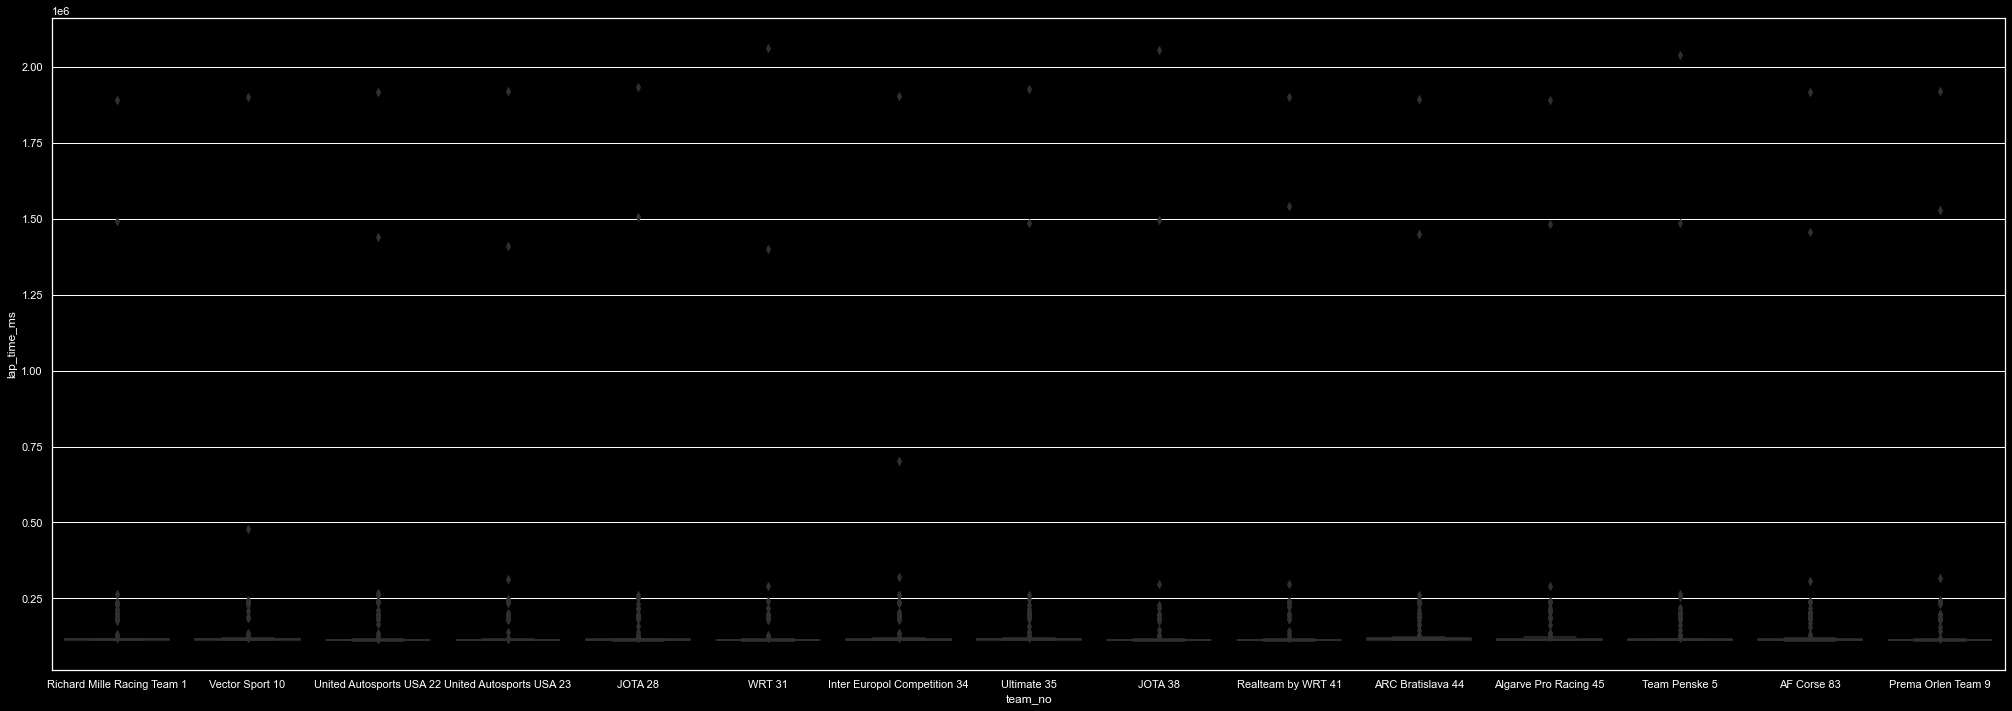

In [12]:
#but if we try to plot this on a graph, it won't be as neatly formatted. see this:
sns.set(rc={'figure.figsize':(35,12)})
plt.style.use('dark_background')
sns.boxplot(data = sebring_laps_lmp2, x = 'team_no', y = 'lap_time_ms', palette = 'bright')

In [13]:
#the laps from under safety car, fcy and others are probably driving up the times.
#we can eliminate those by just making it under green flagb (GF) running
sebring_laps_lmp2.FLAG_AT_FL = sebring_laps_lmp2.FLAG_AT_FL.str.replace(" ", "")
sebring_laps_lmp2_gf = sebring_laps_lmp2[sebring_laps_lmp2['FLAG_AT_FL'] == "GF"]
sebring_laps_lmp2_gf.reset_index(drop = True)
sebring_laps_lmp2_gf

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,1.0,NaN,3.0,1.0,2:03.750,41.661,41.326,40.763,175.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,123750,123.750,Richard Mille Racing Team 1
1,1.0,NaN,3.0,2.0,1:53.835,33.887,39.585,40.363,190.3,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113835,113.835,Richard Mille Racing Team 1
2,1.0,NaN,3.0,3.0,1:53.408,34.080,39.336,39.992,191.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113408,113.408,Richard Mille Racing Team 1
3,1.0,NaN,3.0,4.0,1:52.926,33.461,39.513,39.952,191.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112926,112.926,Richard Mille Racing Team 1
4,1.0,NaN,3.0,5.0,1:52.332,33.384,39.181,39.767,192.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112332,112.332,Richard Mille Racing Team 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,9.0,NaN,2.0,133.0,1:53.018,33.720,39.454,39.844,191.7,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113018,113.018,Prema Orlen Team 9
2811,9.0,NaN,2.0,134.0,1:54.741,34.732,40.077,39.932,188.8,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,114741,114.741,Prema Orlen Team 9
2812,9.0,NaN,2.0,135.0,1:52.817,33.438,39.500,39.879,192.1,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,112817,112.817,Prema Orlen Team 9
2813,9.0,NaN,2.0,136.0,1:53.134,33.611,39.530,39.993,191.5,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113134,113.134,Prema Orlen Team 9


<AxesSubplot:xlabel='team_no', ylabel='lap_time_ms'>

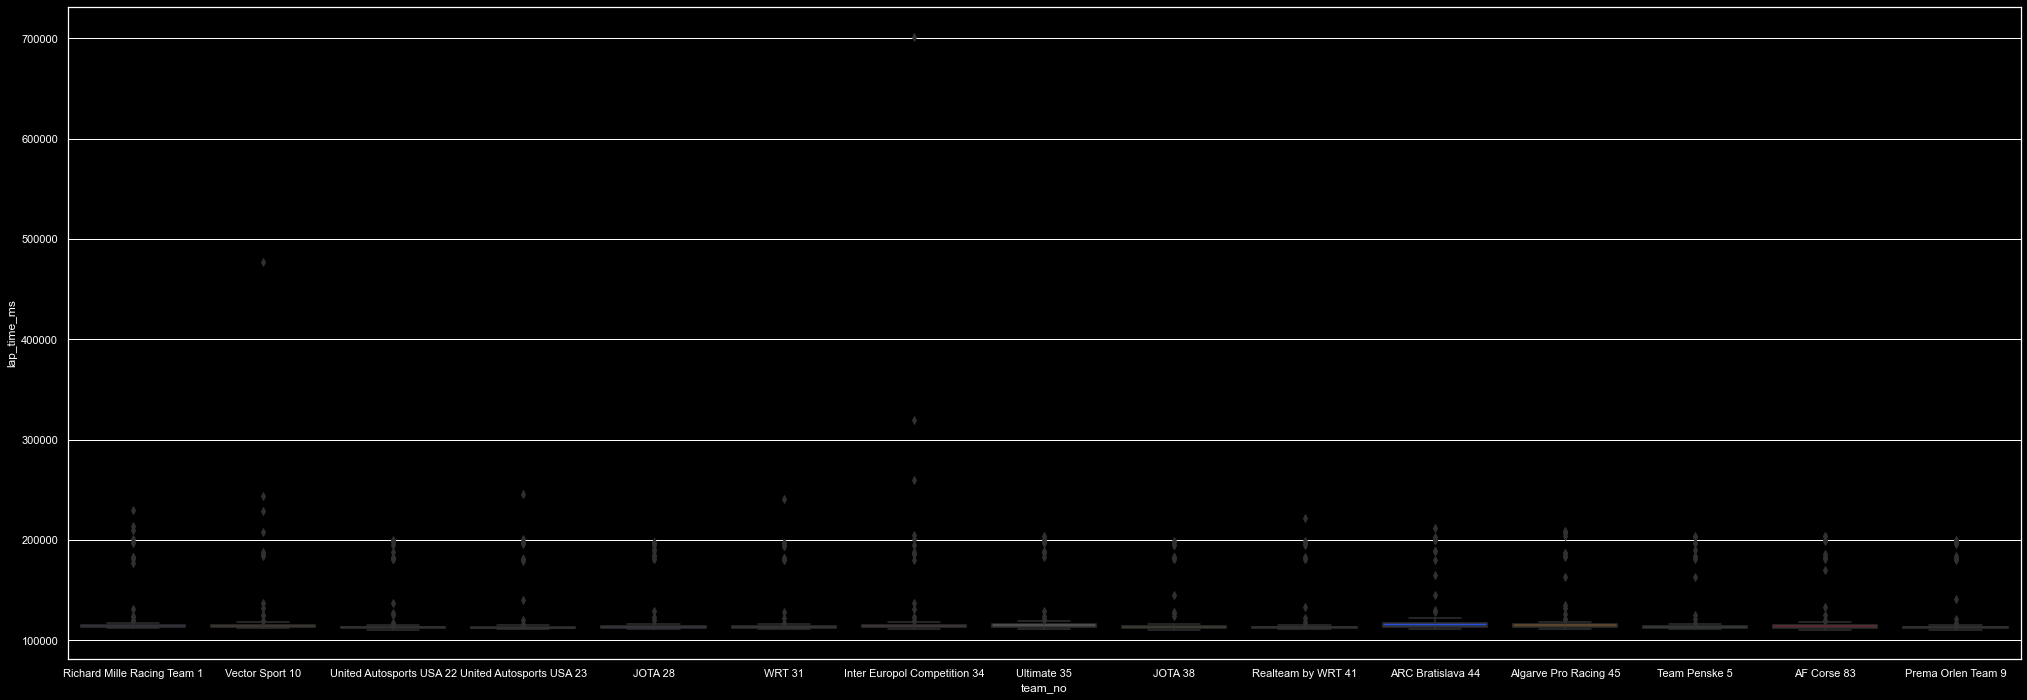

In [14]:
#so let's try that again with GF laps.
sns.set(rc={'figure.figsize':(35,12)})
plt.style.use('dark_background')
sns.boxplot(data = sebring_laps_lmp2_gf, x = 'team_no', y = 'lap_time_ms', palette = 'bright')

In [15]:
#we did decrease the lap times pretty significantly with just the green flag running changes.
sebring_laps_lmp2_gf.groupby("TEAM").mean()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,KPH,lap_time_ms,lap_time_s
TEAM,,,,,,
AF Corse,83.000000,2.071429,93.335165,186.496703,117721.500000,117.721500
ARC Bratislava,44.000000,2.122905,92.284916,184.331285,119166.854749,119.166855
Algarve Pro Racing,45.000000,2.154696,92.845304,185.375138,118505.563536,118.505564
Inter Europol Competition,34.000000,2.148810,86.250000,183.448214,123560.000000,123.560000
JOTA,33.000000,2.046703,93.747253,187.185165,117256.217033,117.256217
Prema Orlen Team,9.000000,2.103825,93.825137,187.718579,116930.010929,116.930011
Realteam by WRT,41.000000,1.902174,94.347826,187.685326,117071.989130,117.071989
Richard Mille Racing Team,1.000000,1.765363,92.256983,184.607263,119310.703911,119.310704
Team Penske,5.000000,2.109890,93.747253,187.288462,117185.456044,117.185456


In [16]:
#however, the graph doesn't really tell us anything, probably because it includes pitted laps as well
#let's take the pitted laps out as well
sebring_laps_lmp2_gf_no_pit = sebring_laps_lmp2_gf[sebring_laps_lmp2_gf['CROSSING_FINISH_LINE_IN_PIT'].isna()]
sebring_laps_lmp2_gf_no_pit = sebring_laps_lmp2_gf_no_pit.reset_index(drop = True)
sebring_laps_lmp2_gf_no_pit

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,1.0,NaN,3.0,1.0,2:03.750,41.661,41.326,40.763,175.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,123750,123.750,Richard Mille Racing Team 1
1,1.0,NaN,3.0,2.0,1:53.835,33.887,39.585,40.363,190.3,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113835,113.835,Richard Mille Racing Team 1
2,1.0,NaN,3.0,3.0,1:53.408,34.080,39.336,39.992,191.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113408,113.408,Richard Mille Racing Team 1
3,1.0,NaN,3.0,4.0,1:52.926,33.461,39.513,39.952,191.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112926,112.926,Richard Mille Racing Team 1
4,1.0,NaN,3.0,5.0,1:52.332,33.384,39.181,39.767,192.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112332,112.332,Richard Mille Racing Team 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,9.0,NaN,2.0,133.0,1:53.018,33.720,39.454,39.844,191.7,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113018,113.018,Prema Orlen Team 9
2558,9.0,NaN,2.0,134.0,1:54.741,34.732,40.077,39.932,188.8,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,114741,114.741,Prema Orlen Team 9
2559,9.0,NaN,2.0,135.0,1:52.817,33.438,39.500,39.879,192.1,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,112817,112.817,Prema Orlen Team 9
2560,9.0,NaN,2.0,136.0,1:53.134,33.611,39.530,39.993,191.5,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113134,113.134,Prema Orlen Team 9


In [17]:
#even smaller, which is promising!
sebring_laps_lmp2_gf_no_pit.groupby("TEAM").mean()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,KPH,lap_time_ms,lap_time_s
TEAM,,,,,,
AF Corse,83.000000,2.074713,93.706897,189.890805,114271.057471,114.271057
ARC Bratislava,44.000000,2.117647,92.711765,187.978824,115429.517647,115.429518
Algarve Pro Racing,45.000000,2.150289,93.005780,188.830058,114902.127168,114.902127
Inter Europol Competition,34.000000,2.150000,86.575000,187.771875,116139.056250,116.139056
JOTA,32.985591,2.048991,94.172911,190.640634,113854.072046,113.854072
Prema Orlen Team,9.000000,2.091429,94.091429,191.018857,113685.605714,113.685606
Realteam by WRT,41.000000,1.897727,94.625000,191.010795,113779.880682,113.779881
Richard Mille Racing Team,1.000000,1.770588,92.500000,188.480000,115269.188235,115.269188
Team Penske,5.000000,2.114943,94.155172,190.712069,113726.229885,113.726230


<AxesSubplot:xlabel='team_no', ylabel='lap_time_ms'>

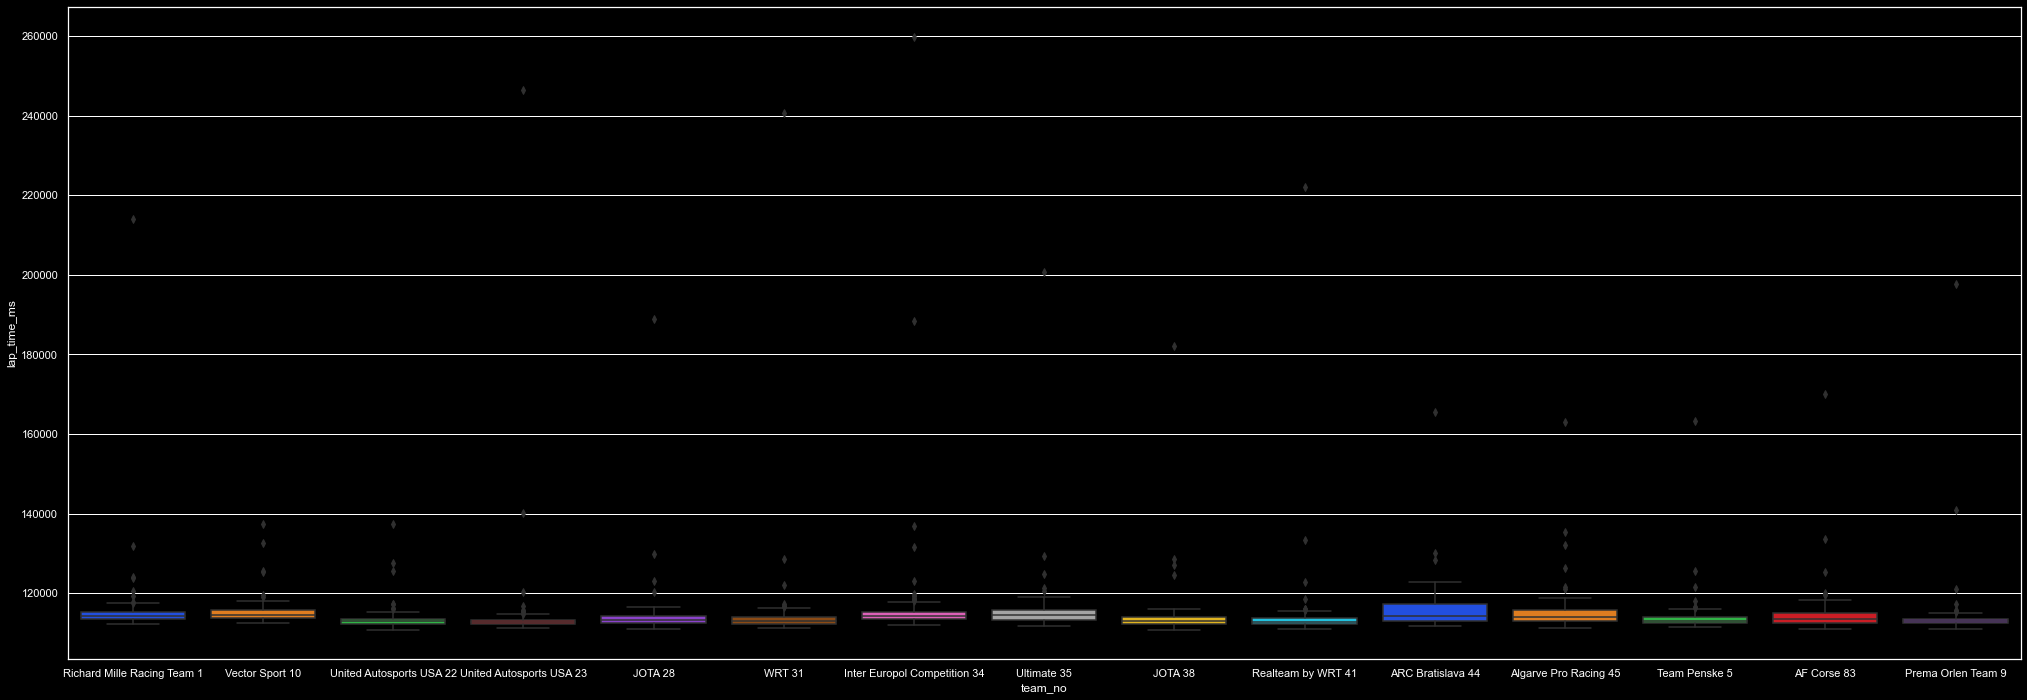

In [18]:
#how does the graph look?
sns.set(rc={'figure.figsize':(35,12)})
plt.style.use('dark_background')
sns.boxplot(data = sebring_laps_lmp2_gf_no_pit, x = 'team_no', y = 'lap_time_ms', palette = 'bright')

In [19]:
#better, but there's still plenty of outliers. people probably went off track or had damage, 
#or it could even be the pitted lap start, which I don't think is covered.
#So let's calculate the 107% time, which is used in F1 to elimiate qualifiers.
#the 107% time would be the min time multiplied by 7%
cutoff_time = sebring_laps_lmp2_gf_no_pit.lap_time_ms.min() * 1.07
sebring_laps_lmp2_gf_no_pit_107_time = sebring_laps_lmp2_gf_no_pit[sebring_laps_lmp2_gf_no_pit['lap_time_ms'] < cutoff_time]
sebring_laps_lmp2_gf_no_pit_107_time = sebring_laps_lmp2_gf_no_pit_107_time.reset_index(drop = True)
sebring_laps_lmp2_gf_no_pit_107_time

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,1.0,NaN,3.0,2.0,1:53.835,33.887,39.585,40.363,190.3,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113835,113.835,Richard Mille Racing Team 1
1,1.0,NaN,3.0,3.0,1:53.408,34.080,39.336,39.992,191.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113408,113.408,Richard Mille Racing Team 1
2,1.0,NaN,3.0,4.0,1:52.926,33.461,39.513,39.952,191.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112926,112.926,Richard Mille Racing Team 1
3,1.0,NaN,3.0,5.0,1:52.332,33.384,39.181,39.767,192.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112332,112.332,Richard Mille Racing Team 1
4,1.0,NaN,3.0,6.0,1:53.227,33.961,39.375,39.891,191.4,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113227,113.227,Richard Mille Racing Team 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,9.0,NaN,2.0,133.0,1:53.018,33.720,39.454,39.844,191.7,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113018,113.018,Prema Orlen Team 9
2472,9.0,NaN,2.0,134.0,1:54.741,34.732,40.077,39.932,188.8,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,114741,114.741,Prema Orlen Team 9
2473,9.0,NaN,2.0,135.0,1:52.817,33.438,39.500,39.879,192.1,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,112817,112.817,Prema Orlen Team 9
2474,9.0,NaN,2.0,136.0,1:53.134,33.611,39.530,39.993,191.5,LMP2,Prema Orlen Team,Oreca,GF,louis deletraz,G,113134,113.134,Prema Orlen Team 9


Text(0, 0.5, 'Lap Time (s)')

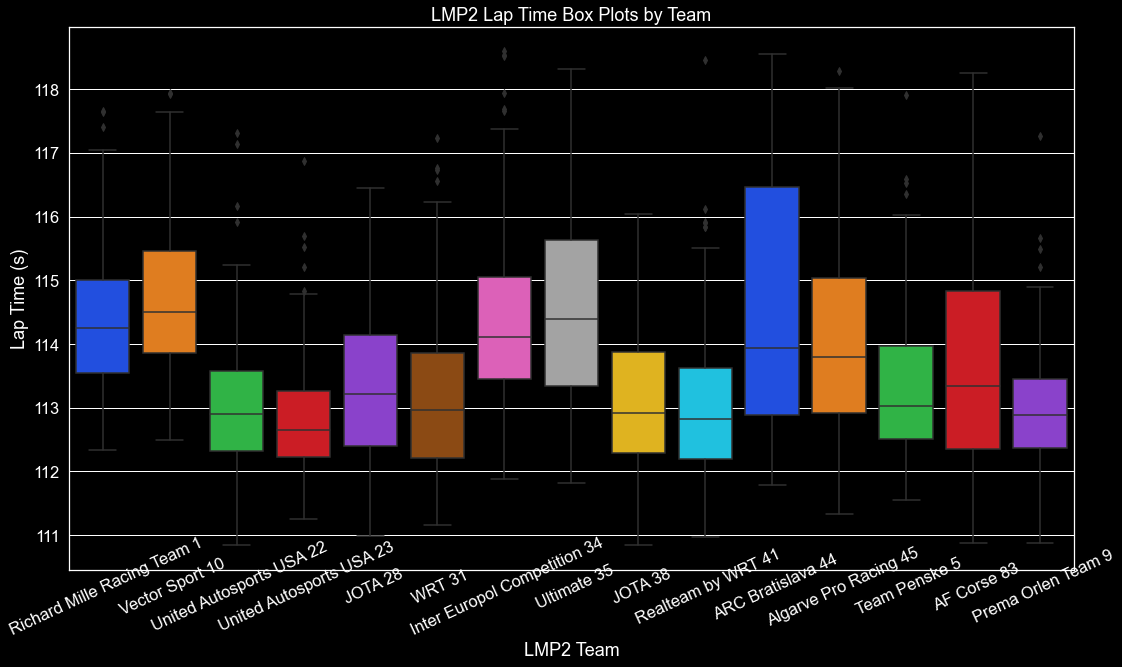

In [20]:
sns.set(font_scale = 1.5, rc={'figure.figsize':(18,10)})
plt.style.use('dark_background')
ax = sns.boxplot(data = sebring_laps_lmp2_gf_no_pit_107_time, x = 'team_no', y = 'lap_time_s', palette = 'bright')
#I added this rotation to make the labels not overlap each other. 
#there's a better way to loop through the labels and add line breaks, but I think this looks fine for now.
ax.set_xticklabels(ax.get_xticklabels(), rotation = 25,wrap = True)
ax.set_title("LMP2 Lap Time Box Plots by Team")
ax.set_xlabel("LMP2 Team")
ax.set_ylabel("Lap Time (s)")


In [21]:
#shows pretty neatly!
#we probably could have done that from the start to be fair
#but I wanted to show the entire process and to just show that we're not arbitrarily eliminating outliers.
#let's do the same thing with the LMGTE class

In [22]:
#so let's combine the GTE field
sebring_laps_gte = sebring_laps[(sebring_laps['CLASS'] == "LMGTE Pro") | (sebring_laps['CLASS'] == "LMGTE Am")]
sebring_laps_gte = sebring_laps_gte.reset_index(drop = True)

#and if we want to analyze gte_pro only we can just filter for it
sebring_laps_gte_pro = sebring_laps_gte[sebring_laps_gte['CLASS'] == "LMGTE Pro"]
sebring_laps_gte_pro.groupby("TEAM").mean()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,KPH,lap_time_ms,lap_time_s
TEAM,,,,,,
AF Corse,51.495868,1.606061,91.256198,173.137466,144763.396694,144.763397
Corvette Racing,64.000000,1.557377,92.000000,174.939344,142943.060109,142.943060
Porsche GT Team,91.500000,1.587432,92.000000,174.667760,142923.792350,142.923792


In [23]:
#now let's do the 107% rule to avoid all the hassle we just went through before.
cutoff_time_gte = sebring_laps_gte.lap_time_ms.min() * 1.07
sebring_laps_gte_pro_107_time = sebring_laps_gte_pro[sebring_laps_gte_pro['lap_time_ms'] < cutoff_time_gte]
sebring_laps_gte_pro_107_time = sebring_laps_gte_pro_107_time.reset_index(drop = True)
sebring_laps_gte_pro_107_time

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,51.0,NaN,2.0,2.0,2:00.837,36.103,42.061,42.673,179.3,LMGTE Pro,AF Corse,Ferrari,GF,james calado,P,120837,120.837,AF Corse 51
1,51.0,NaN,2.0,3.0,2:00.094,35.635,41.950,42.509,180.4,LMGTE Pro,AF Corse,Ferrari,GF,james calado,P,120094,120.094,AF Corse 51
2,51.0,NaN,2.0,4.0,1:59.964,35.452,41.809,42.703,180.6,LMGTE Pro,AF Corse,Ferrari,GF,james calado,P,119964,119.964,AF Corse 51
3,51.0,NaN,2.0,5.0,1:59.873,35.422,41.796,42.655,180.8,LMGTE Pro,AF Corse,Ferrari,GF,james calado,P,119873,119.873,AF Corse 51
4,51.0,NaN,2.0,6.0,1:59.618,35.565,41.582,42.471,181.1,LMGTE Pro,AF Corse,Ferrari,GF,james calado,P,119618,119.618,AF Corse 51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,92.0,NaN,1.0,178.0,1:58.346,35.182,41.199,41.965,183.1,LMGTE Pro,Porsche GT Team,Porsche,GF,michael christensen,P,118346,118.346,Porsche GT Team 92
828,92.0,NaN,1.0,179.0,1:58.407,35.179,41.151,42.077,183.0,LMGTE Pro,Porsche GT Team,Porsche,GF,michael christensen,P,118407,118.407,Porsche GT Team 92
829,92.0,NaN,1.0,180.0,1:58.521,35.285,41.133,42.103,182.8,LMGTE Pro,Porsche GT Team,Porsche,GF,michael christensen,P,118521,118.521,Porsche GT Team 92
830,92.0,NaN,1.0,181.0,1:58.175,35.084,40.991,42.100,183.4,LMGTE Pro,Porsche GT Team,Porsche,GF,michael christensen,P,118175,118.175,Porsche GT Team 92


Text(0.5, 1.0, 'GTE Pro Lap Time by Team')

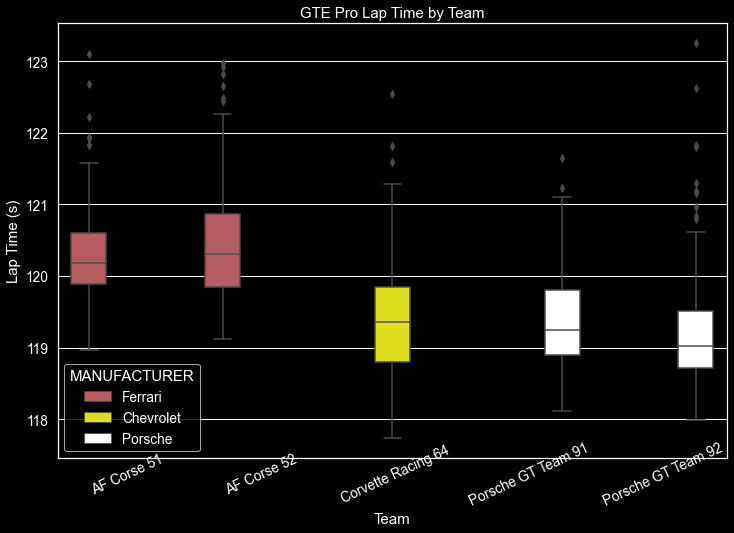

In [24]:
#now let's plot the GTEPRO times 
man_colors = {"Ferrari":"r", 'Aston Martin':"g", "Porsche":'white', 'Chevrolet':"yellow"}
sns.set(font_scale = 1.25, rc={'figure.figsize':(12,8)})
plt.style.use('dark_background')
ax2 = sns.boxplot(data = sebring_laps_gte_pro_107_time, x = 'team_no', y = 'lap_time_s', palette = man_colors, hue = "MANUFACTURER")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 25, wrap = True)
ax2.set_xlabel("Team")
ax2.set_ylabel("Lap Time (s)")
ax2.set_title("GTE Pro Lap Time by Team")

Text(0.5, 1.0, 'GTE PRO Lap Times by Driver')

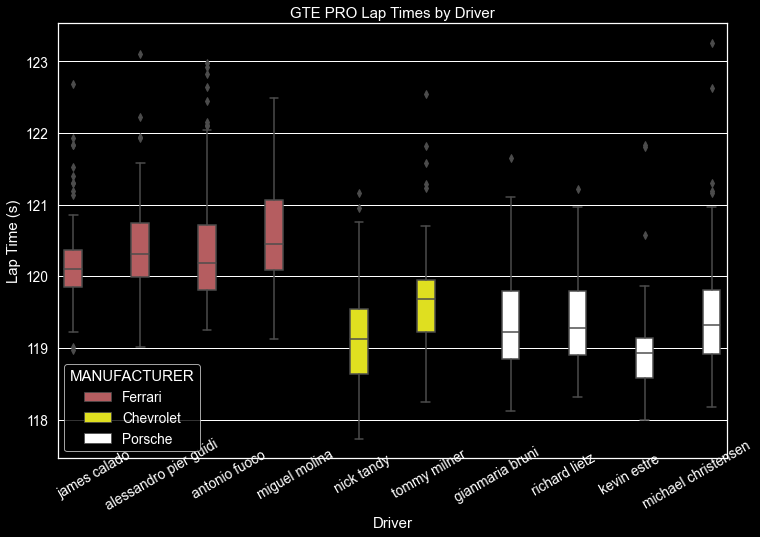

In [25]:
#now we can see that the #92 porsche (which ended up winning the race) had consistent and faster lap times (lower is faster)
#we can even go a step further and group it by driver name instead of team. 
sns.set(font_scale = 1.25, rc={'figure.figsize':(12,8)})
plt.style.use('dark_background')
ax3 = sns.boxplot(data = sebring_laps_gte_pro_107_time, x = 'DRIVER_NAME', y = 'lap_time_s', palette = man_colors, hue = "MANUFACTURER")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 30,wrap = True)
ax3.set_xlabel("Driver")
ax3.set_ylabel("Lap Time (s)")
ax3.set_title("GTE PRO Lap Times by Driver")

Text(0, 0.5, 'Lap Time (s)')

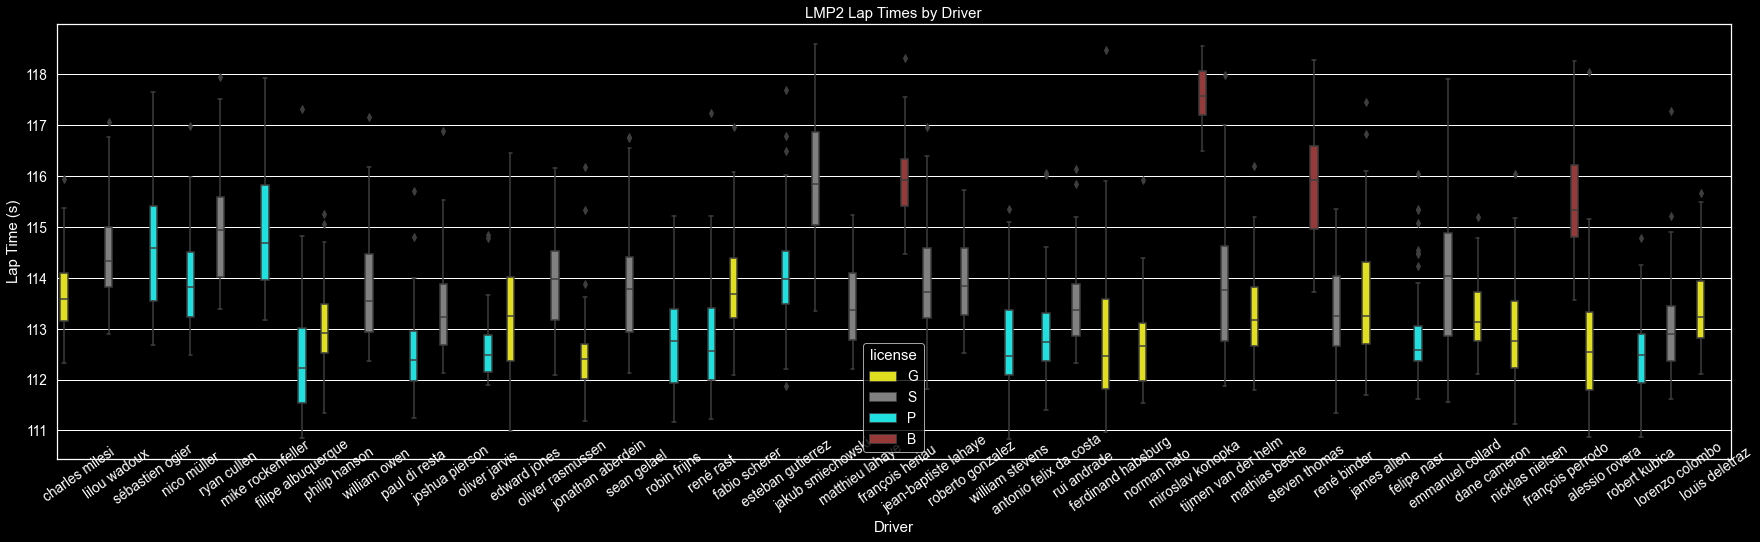

In [26]:
#we can do the same thing for LMP2 drivers, although it's a bit crowded. 
#This is where I would try to figure out the line break
#or just use their last name for reference.

#adding a color set to represent the classes
license_colors = {"G":"yellow", 'S':"grey", 'B':"brown", 'P':"cyan"}

sns.set(font_scale = 1.25, rc={'figure.figsize':(30,8)})
plt.style.use('dark_background')
ax4 = sns.boxplot(data = sebring_laps_lmp2_gf_no_pit_107_time, x = 'DRIVER_NAME', y = 'lap_time_s', hue = "license", palette = license_colors)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 35,wrap = True)
ax4.set_title("LMP2 Lap Times by Driver")
ax4.set_xlabel("Driver")
ax4.set_ylabel("Lap Time (s)")

In [27]:
#here we do the cutoffs for gte
sebring_laps_gte_107_time = sebring_laps_gte[sebring_laps_gte['lap_time_ms'] < cutoff_time_gte]
sebring_laps_gte_107_time = sebring_laps_gte_107_time.reset_index(drop = True)

Text(0.5, 1.0, 'GTE Lap Time by Team')

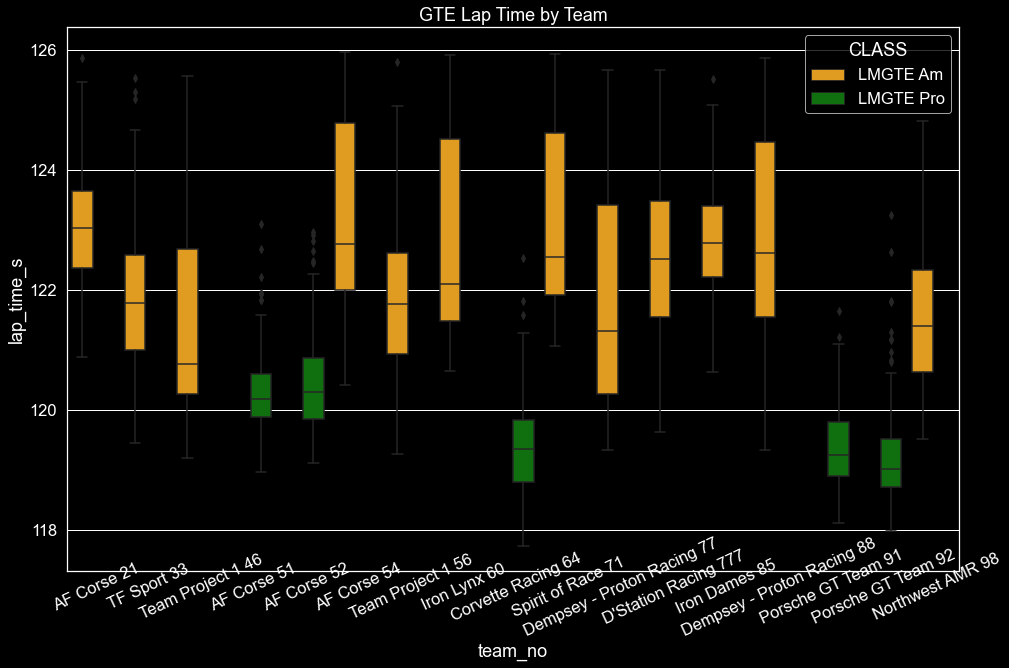

In [28]:
sns.set(font_scale = 1.5, style = 'darkgrid', rc={'figure.figsize':(16,10)})
plt.style.use('dark_background')

gte_colors = {"LMGTE Am": 'orange', "LMGTE Pro" : "green"}

ax5 = sns.boxplot(data = sebring_laps_gte_107_time, x = 'team_no', y = 'lap_time_s', palette = gte_colors, hue = "CLASS")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation = 25,wrap = True)
ax5.set_title("GTE Lap Time by Team")

Text(0.5, 1.0, 'GTE Lap Time by Team')

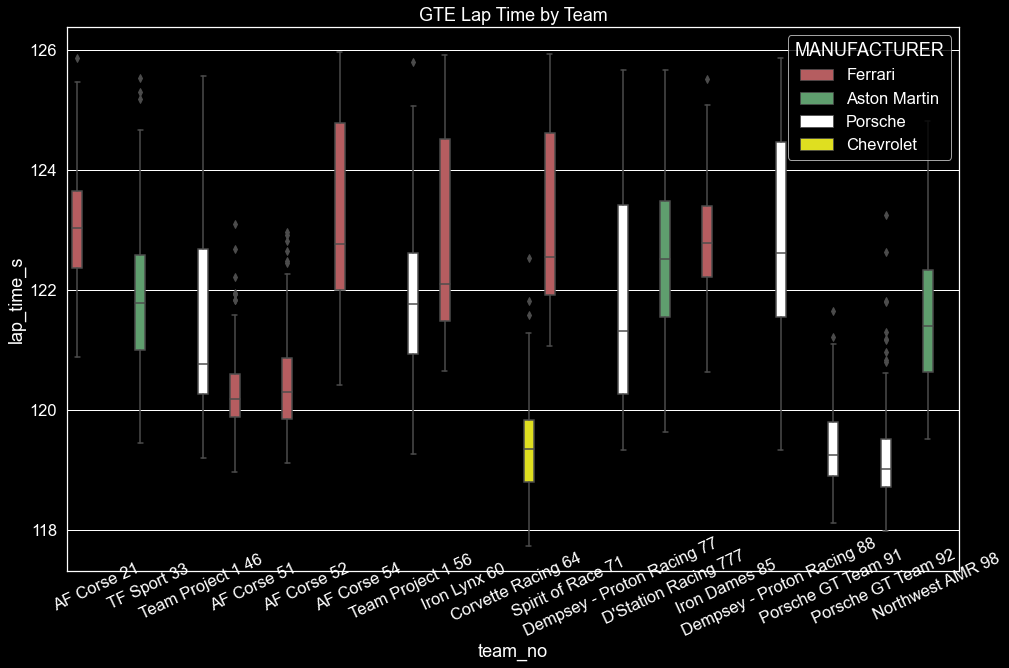

In [29]:
#Here, we can see that the GTE pro drivers are much faster than the GTE AM drivers.
#let's compare by manufacturer
ax6 = sns.boxplot(data = sebring_laps_gte_107_time, x = 'team_no', y = 'lap_time_s', palette = man_colors, hue = "MANUFACTURER")
ax6.set_xticklabels(ax6.get_xticklabels(), rotation = 25,wrap = True)
ax6.set_title("GTE Lap Time by Team")

In [30]:
#let's also compare the amateur drivers by license class, so pull the am drivers out
sebring_laps_gte_am_107_time = sebring_laps_gte_107_time[sebring_laps_gte_107_time['CLASS'] == "LMGTE Am"].reset_index(drop=True)
sebring_laps_gte_am_107_time

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,21.0,NaN,1.0,2.0,2:05.465,37.808,43.730,43.927,172.7,LMGTE Am,AF Corse,Ferrari,GF,simon mann,S,125465,125.465,AF Corse 21
1,21.0,NaN,1.0,3.0,2:04.781,37.416,43.499,43.866,173.7,LMGTE Am,AF Corse,Ferrari,GF,simon mann,S,124781,124.781,AF Corse 21
2,21.0,NaN,1.0,4.0,2:04.921,37.421,43.524,43.976,173.5,LMGTE Am,AF Corse,Ferrari,GF,simon mann,S,124921,124.921,AF Corse 21
3,21.0,NaN,1.0,5.0,2:05.305,37.822,43.608,43.875,172.9,LMGTE Am,AF Corse,Ferrari,GF,simon mann,S,125305,125.305,AF Corse 21
4,21.0,NaN,1.0,6.0,2:04.942,37.545,43.504,43.893,173.4,LMGTE Am,AF Corse,Ferrari,GF,simon mann,S,124942,124.942,AF Corse 21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,98.0,NaN,3.0,131.0,2:00.077,35.541,41.656,42.880,180.5,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120077,120.077,Northwest AMR 98
1693,98.0,NaN,3.0,132.0,2:00.536,35.733,42.024,42.779,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120536,120.536,Northwest AMR 98
1694,98.0,NaN,3.0,133.0,2:00.626,35.819,41.963,42.844,179.6,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120626,120.626,Northwest AMR 98
1695,98.0,NaN,3.0,134.0,2:00.511,35.788,41.759,42.964,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120511,120.511,Northwest AMR 98


Text(0, 0.5, 'Lap Time (s)')

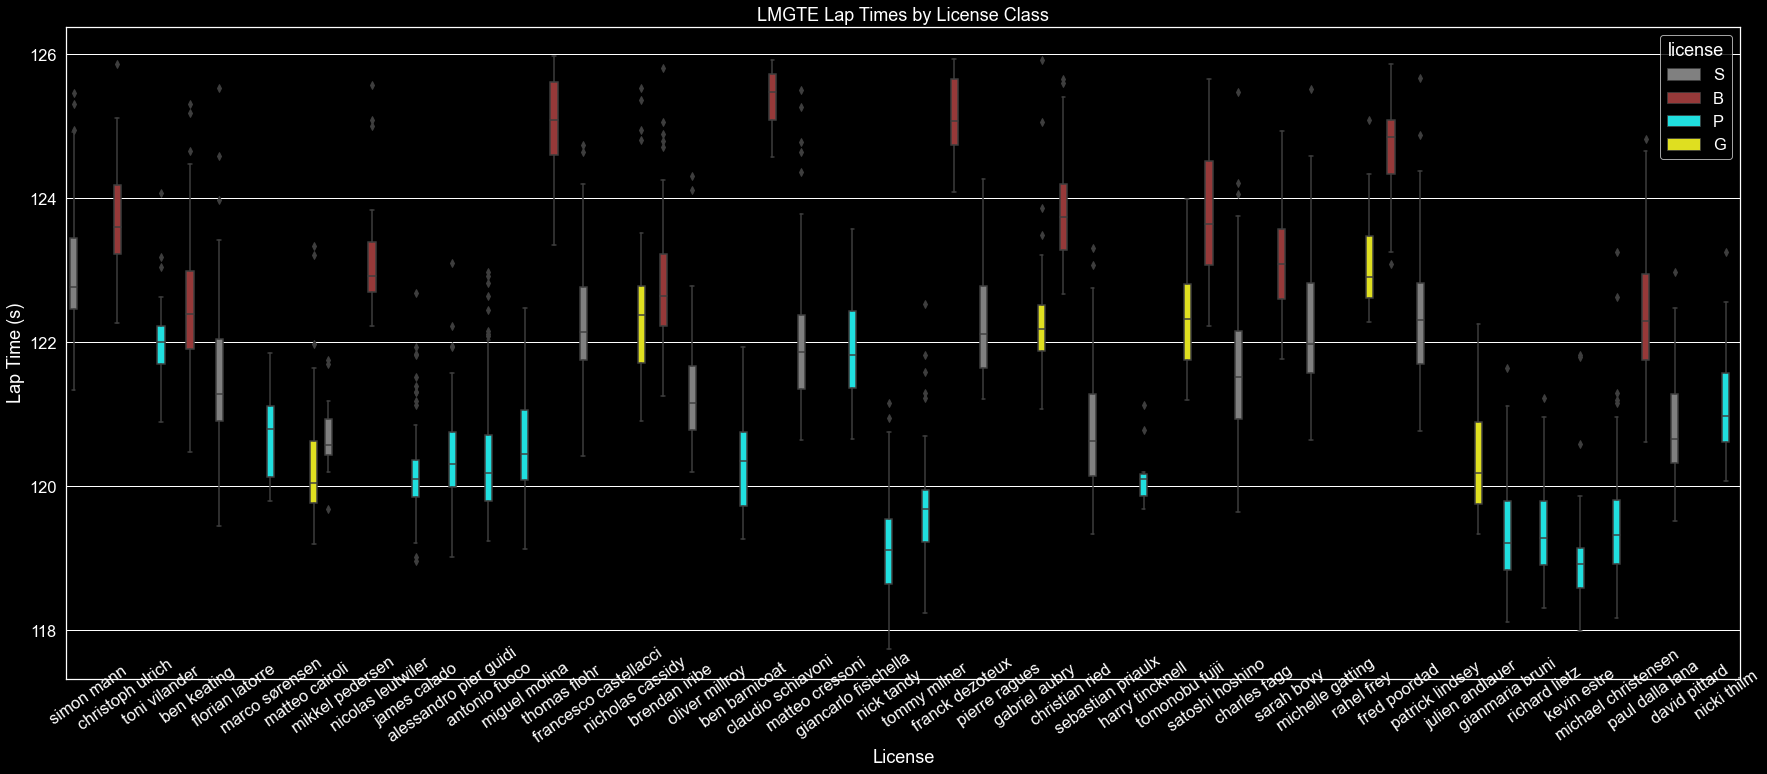

In [31]:
sns.set(font_scale = 1.5, style = 'darkgrid', rc={'figure.figsize':(30,12)})
plt.style.use('dark_background')
ax7 = sns.boxplot(data = sebring_laps_gte_107_time, x = 'DRIVER_NAME', y = 'lap_time_s', palette = license_colors, hue = "license")
ax7.set_xticklabels(ax7.get_xticklabels(), rotation = 35,wrap = True)
ax7.set_title("LMGTE Lap Times by License Class")
ax7.set_xlabel("License")
ax7.set_ylabel("Lap Time (s)")

Text(0, 0.5, '')

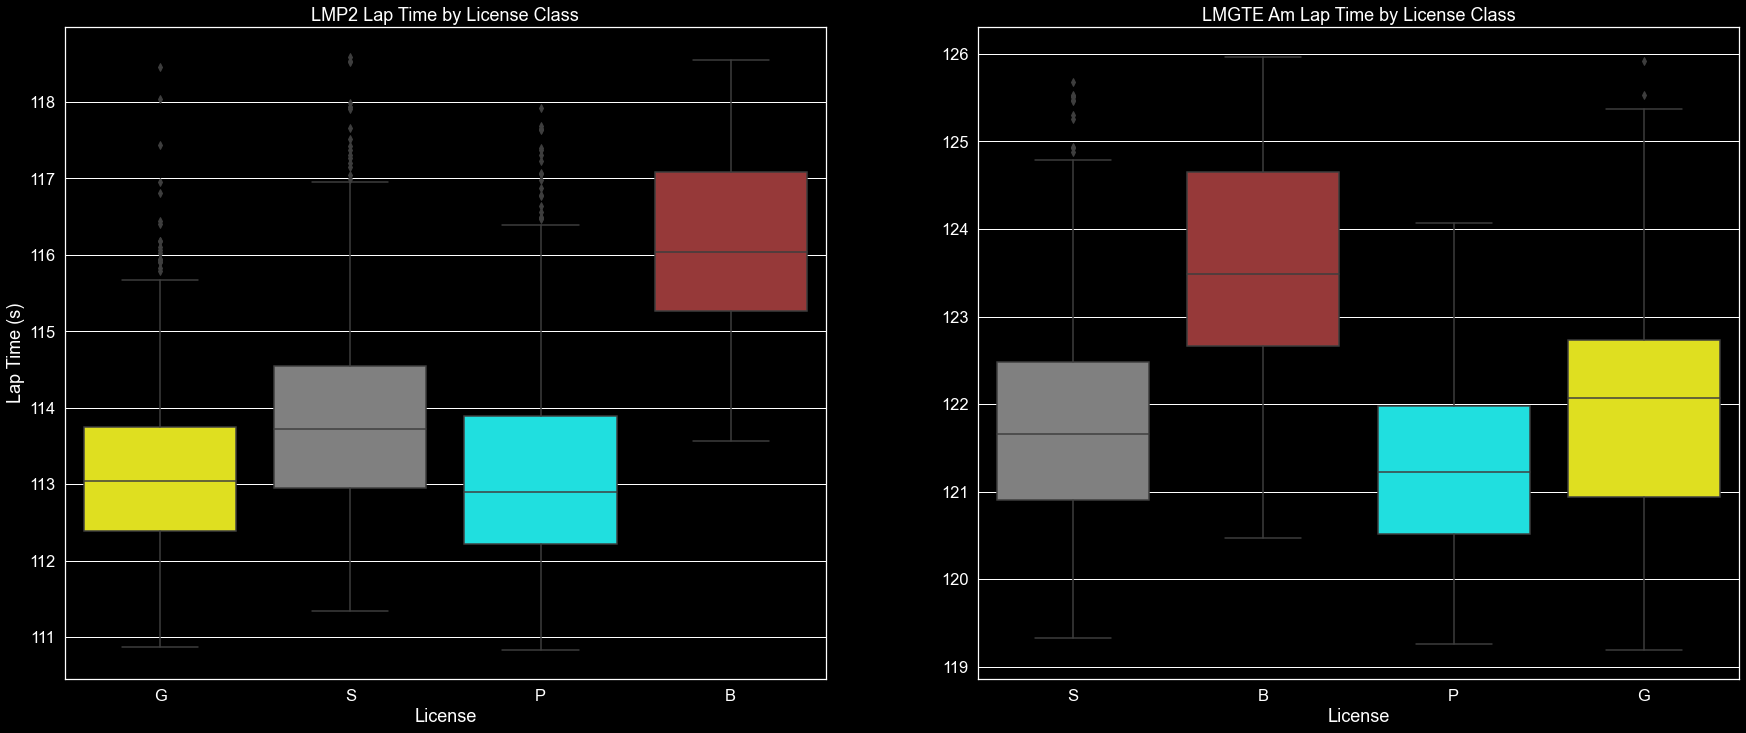

In [32]:
#there's a lot of drivers that are crowding this
#so let's do a side by side comparison between just lmp2 and lmgte am vs license classes

fig, axs = plt.subplots(ncols = 2)
sns.set(font_scale = 1.5, style = 'darkgrid', rc={'figure.figsize':(8, 8)})

plt.style.use('dark_background')
sns.boxplot(data = sebring_laps_lmp2_gf_no_pit_107_time, x = 'license', y = 'lap_time_s', palette=license_colors, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 0,wrap = True)
axs[0].set_title("LMP2 Lap Time by License Class")
axs[0].set_xlabel("License")
axs[0].set_ylabel("Lap Time (s)")
sns.boxplot(data = sebring_laps_gte_am_107_time, x = 'license', y = 'lap_time_s', palette = license_colors, ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 0,wrap = True)
axs[1].set_title("LMGTE Am Lap Time by License Class")
axs[1].set_xlabel("License")
axs[1].set_ylabel("")

In [33]:
sebring_laps_hypercar = sebring_laps[sebring_laps['CLASS'] == "HYPERCAR"].reset_index(drop=True)
hypercar_cutoff = sebring_laps_hypercar.lap_time_ms.min() * 1.07
sebring_laps_hypercar

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,36.0,NaN,3.0,1.0,1:54.835,36.389,39.265,39.181,188.7,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,114835,114.835,Alpine ELF Team 36
1,36.0,NaN,3.0,2.0,1:49.849,32.676,38.610,38.563,197.3,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109849,109.849,Alpine ELF Team 36
2,36.0,NaN,3.0,3.0,1:49.484,32.492,38.510,38.482,197.9,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109484,109.484,Alpine ELF Team 36
3,36.0,NaN,3.0,4.0,1:49.033,32.451,38.440,38.142,198.7,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109033,109.033,Alpine ELF Team 36
4,36.0,NaN,3.0,5.0,1:49.168,32.510,38.432,38.226,198.5,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109168,109.168,Alpine ELF Team 36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,8.0,NaN,3.0,167.0,1:52.519,33.751,39.309,39.459,192.6,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,112519,112.519,Toyota Gazoo Racing 8
687,8.0,NaN,3.0,168.0,1:52.006,33.071,38.995,39.940,193.5,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,112006,112.006,Toyota Gazoo Racing 8
688,8.0,NaN,3.0,169.0,1:51.985,33.074,39.454,39.457,193.5,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,111985,111.985,Toyota Gazoo Racing 8
689,8.0,NaN,3.0,170.0,1:51.973,33.142,39.320,39.511,193.5,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,111973,111.973,Toyota Gazoo Racing 8


In [34]:
sebring_laps_hypercar_cutoff = sebring_laps_hypercar[sebring_laps_hypercar['lap_time_ms'] < hypercar_cutoff].reset_index(drop=True)
sebring_laps_hypercar_cutoff

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no
0,36.0,NaN,3.0,1.0,1:54.835,36.389,39.265,39.181,188.7,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,114835,114.835,Alpine ELF Team 36
1,36.0,NaN,3.0,2.0,1:49.849,32.676,38.610,38.563,197.3,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109849,109.849,Alpine ELF Team 36
2,36.0,NaN,3.0,3.0,1:49.484,32.492,38.510,38.482,197.9,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109484,109.484,Alpine ELF Team 36
3,36.0,NaN,3.0,4.0,1:49.033,32.451,38.440,38.142,198.7,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109033,109.033,Alpine ELF Team 36
4,36.0,NaN,3.0,5.0,1:49.168,32.510,38.432,38.226,198.5,HYPERCAR,Alpine ELF Team,Alpine,GF,matthieu vaxiviere,G,109168,109.168,Alpine ELF Team 36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,8.0,NaN,3.0,167.0,1:52.519,33.751,39.309,39.459,192.6,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,112519,112.519,Toyota Gazoo Racing 8
633,8.0,NaN,3.0,168.0,1:52.006,33.071,38.995,39.940,193.5,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,112006,112.006,Toyota Gazoo Racing 8
634,8.0,NaN,3.0,169.0,1:51.985,33.074,39.454,39.457,193.5,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,111985,111.985,Toyota Gazoo Racing 8
635,8.0,NaN,3.0,170.0,1:51.973,33.142,39.320,39.511,193.5,HYPERCAR,Toyota Gazoo Racing,Toyota,GF,ryo hirakawa,P,111973,111.973,Toyota Gazoo Racing 8


Text(0, 0.5, 'Lap Time (s)')

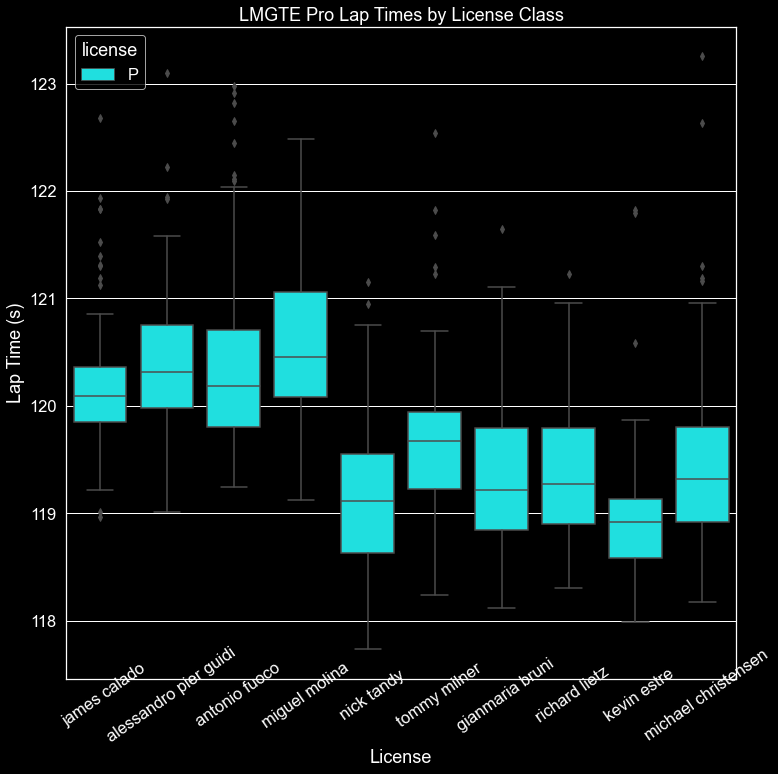

In [35]:
#same goes for lmgte pro lol
sns.set(font_scale = 1.5, style = 'darkgrid', rc={'figure.figsize':(12,12)})
plt.style.use('dark_background')
ax10 = sns.boxplot(data = sebring_laps_gte_pro_107_time, x = 'DRIVER_NAME', y = 'lap_time_s', palette = license_colors, hue = "license")
ax10.set_xticklabels(ax10.get_xticklabels(), rotation = 35,wrap = True)
ax10.set_title("LMGTE Pro Lap Times by License Class")
ax10.set_xlabel("License")
ax10.set_ylabel("Lap Time (s)")

In [36]:
#oh i didn't do this
sebring_laps_hypercar_cutoff['team_no'] = sebring_laps_hypercar_cutoff.TEAM + " " + sebring_laps_hypercar_cutoff.NUMBER.map(int).map(str)
sebring_laps_hypercar_cutoff.groupby("team_no").mean()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,KPH,lap_time_ms,lap_time_s
team_no,,,,,,
Alpine ELF Team 36,36.0,2.202247,95.000000,194.934831,111168.224719,111.168225
Glickenhaus Racing 708,708.0,1.942857,95.411429,193.577143,111943.931429,111.943931
Toyota Gazoo Racing 7,7.0,2.509434,56.018868,193.700943,111868.867925,111.868868
Toyota Gazoo Racing 8,8.0,1.910112,95.230337,193.563483,111951.000000,111.951000


Text(0, 0.5, 'Lap Time (s)')

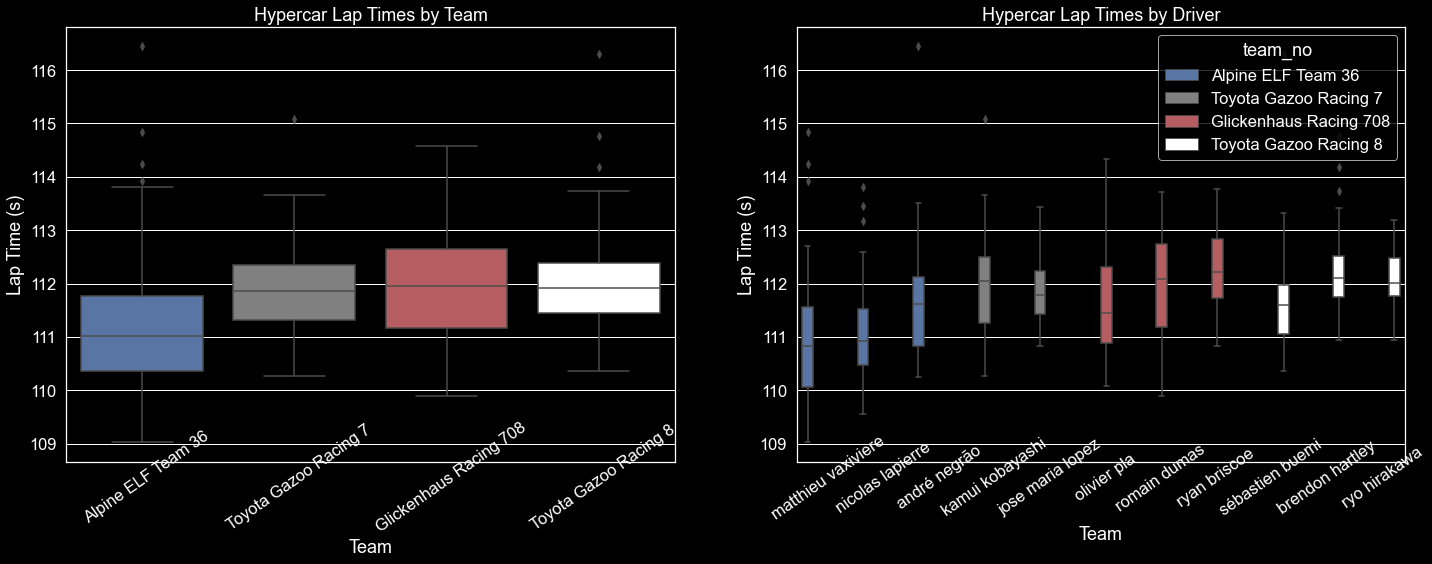

In [37]:
#okay so time to make some stuff I can package/post
hypercar_colors = {"Alpine ELF Team 36": 'b', "Glickenhaus Racing 708": "r", "Toyota Gazoo Racing 7": "gray", "Toyota Gazoo Racing 8": 'white'}

sns.set(font_scale = 1.5, style = 'darkgrid', rc={'figure.figsize':(24,8)})
plt.style.use('dark_background')
fig2, axs2 = plt.subplots(ncols = 2)

sns.boxplot(data = sebring_laps_hypercar_cutoff, x = 'team_no', y = 'lap_time_s', palette = hypercar_colors, ax=axs2[0])
axs2[0].set_xticklabels(axs2[0].get_xticklabels(), rotation = 35,wrap = True)
axs2[0].set_title("Hypercar Lap Times by Team")
axs2[0].set_xlabel("Team")
axs2[0].set_ylabel("Lap Time (s)")
sns.boxplot(data = sebring_laps_hypercar_cutoff, x = 'DRIVER_NAME', y = 'lap_time_s', palette = hypercar_colors, hue = "team_no", ax=axs2[1])
axs2[1].set_xticklabels(axs2[1].get_xticklabels(), rotation = 35,wrap = True)
axs2[1].set_title("Hypercar Lap Times by Driver")
axs2[1].set_xlabel("Team")
axs2[1].set_ylabel("Lap Time (s)")

Text(0.5, 1.0, 'GTE PRO Lap Times by Driver')

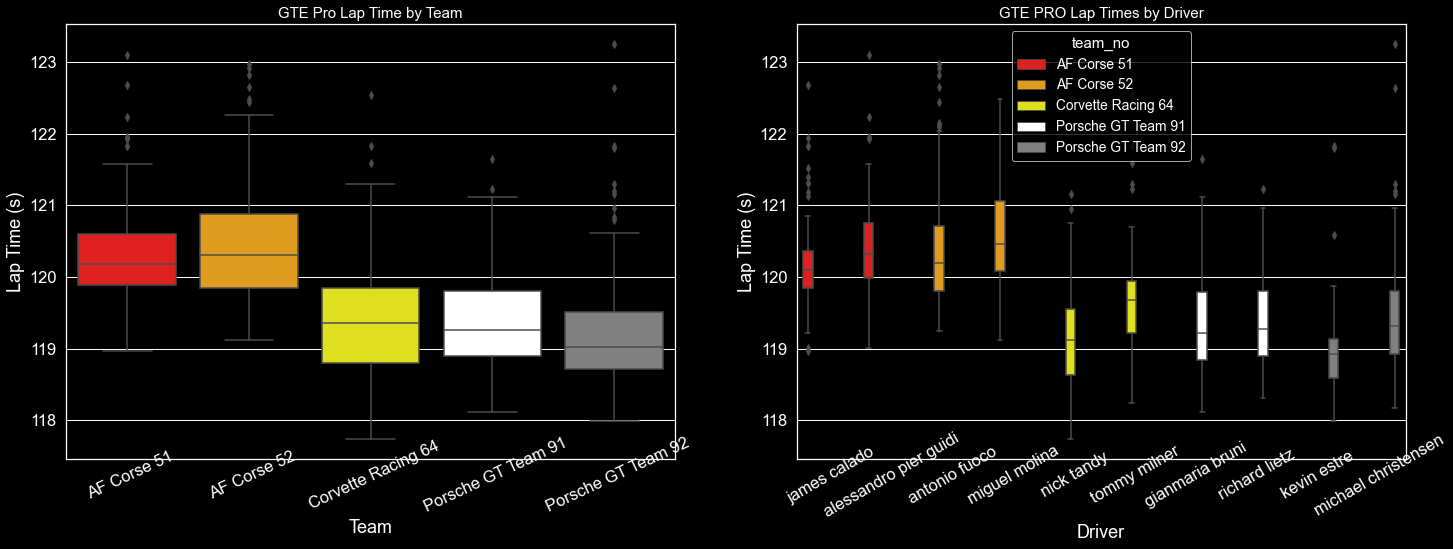

In [38]:
gte_pro_team_colors = {"AF Corse 51": "red", "AF Corse 52": "orange", "Corvette Racing 64": "yellow", "Porsche GT Team 91":"white", "Porsche GT Team 92":"gray" }

fig3, axs3 = plt.subplots(ncols = 2)

sns.set(font_scale = 1.25, rc={'figure.figsize':(24,8)})
plt.style.use('dark_background')
sns.boxplot(data = sebring_laps_gte_pro_107_time, x = 'team_no', y = 'lap_time_s', palette = gte_pro_team_colors, ax=axs3[0])
axs3[0].set_xticklabels(axs3[0].get_xticklabels(), rotation = 25, wrap = True)
axs3[0].set_xlabel("Team")
axs3[0].set_ylabel("Lap Time (s)")
axs3[0].set_title("GTE Pro Lap Time by Team")

#now we can see that the #92 porsche (which ended up winning the race) had consistent and faster lap times (lower is faster)
#we can even go a step further and group it by driver name instead of team. 
sns.boxplot(data = sebring_laps_gte_pro_107_time, x = 'DRIVER_NAME', y = 'lap_time_s', palette = gte_pro_team_colors, hue = "team_no", ax=axs3[1])
axs3[1].set_xticklabels(ax3.get_xticklabels(), rotation = 30,wrap = True)
axs3[1].set_xlabel("Driver")
axs3[1].set_ylabel("Lap Time (s)")
axs3[1].set_title("GTE PRO Lap Times by Driver")


In [57]:
#something we should do is measure the stint number. 

#set this new col to nan
sebring_laps['stint_no'] = np.nan
# B in crossing_finish_line_in_pit
stint_no = 1
driver_name = "charles milesi"
for i in range(0, len(sebring_laps["TEAM"])):
    x = sebring_laps.iloc[i]
    #when we cross the pit line
    if x['CROSSING_FINISH_LINE_IN_PIT'] == "B":
        #if we change drivers:
        if x['DRIVER_NAME'] != driver_name:
            stint_no = 1
            driver_name = x['DRIVER_NAME']
        else:
            stint_no = stint_no + 1
    #otherwise, set the stint no
    sebring_laps.at[i, 'stint_no'] = int(stint_no)
sebring_laps['stint_no'] = sebring_laps.stint_no.map(int)
#okay, now we have the stint numbers, but if we try to plot this, we'll get random stint numbers, so let's associate that with the drivers.
sebring_laps['driver_stint_no'] = sebring_laps['DRIVER_NAME'] + "_" + sebring_laps['stint_no'].map(str)


#we can also associate it with the teams
sebring_laps

C:\Users\trist\AppData\Local\Temp\ipykernel_29100\3688138606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sebring_laps['stint_no'] = np.nan
C:\Users\trist\AppData\Local\Temp\ipykernel_29100\3688138606.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sebring_laps['stint_no'] = sebring_laps.stint_no.map(int)
C:\Users\trist\AppData\Local\Temp\ipykernel_29100\3688138606.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,NUMBER,CROSSING_FINISH_LINE_IN_PIT,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,S1,S2,S3,KPH,CLASS,TEAM,MANUFACTURER,FLAG_AT_FL,DRIVER_NAME,license,lap_time_ms,lap_time_s,team_no,stint_no,driver_stint_no
0,1.0,NaN,3.0,1.0,2:03.750,41.661,41.326,40.763,175.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,123750,123.750,Richard Mille Racing Team 1,1,charles milesi_1
1,1.0,NaN,3.0,2.0,1:53.835,33.887,39.585,40.363,190.3,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113835,113.835,Richard Mille Racing Team 1,1,charles milesi_1
2,1.0,NaN,3.0,3.0,1:53.408,34.080,39.336,39.992,191.1,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,113408,113.408,Richard Mille Racing Team 1,1,charles milesi_1
3,1.0,NaN,3.0,4.0,1:52.926,33.461,39.513,39.952,191.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112926,112.926,Richard Mille Racing Team 1,1,charles milesi_1
4,1.0,NaN,3.0,5.0,1:52.332,33.384,39.181,39.767,192.9,LMP2,Richard Mille Racing Team,Oreca,GF,charles milesi,G,112332,112.332,Richard Mille Racing Team 1,1,charles milesi_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,98.0,NaN,3.0,131.0,2:00.077,35.541,41.656,42.880,180.5,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120077,120.077,Northwest AMR 98,1,nicki thiim_1
6403,98.0,NaN,3.0,132.0,2:00.536,35.733,42.024,42.779,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120536,120.536,Northwest AMR 98,1,nicki thiim_1
6404,98.0,NaN,3.0,133.0,2:00.626,35.819,41.963,42.844,179.6,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120626,120.626,Northwest AMR 98,1,nicki thiim_1
6405,98.0,NaN,3.0,134.0,2:00.511,35.788,41.759,42.964,179.8,LMGTE Am,Northwest AMR,Aston Martin,GF,nicki thiim,P,120511,120.511,Northwest AMR 98,1,nicki thiim_1


In [67]:
sebring_laps_william_stevens = sebring_laps[sebring_laps['CLASS'] == 'LMGTE Pro'].reset_index(drop=True)

sebring_laps_william_stevens.groupby('driver_stint_no').mean()
#print(cutoff_time)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,KPH,lap_time_ms,lap_time_s,stint_no
driver_stint_no,,,,,,,
alessandro pier guidi_1,51.0,1.0,74.500000,177.543333,123034.433333,123.034433,1.0
alessandro pier guidi_2,51.0,1.0,105.000000,163.038710,191720.064516,191.720065,2.0
alessandro pier guidi_3,51.0,1.0,173.500000,157.930000,211422.650000,211.422650,3.0
antonio fuoco_1,52.0,2.0,42.500000,177.353333,123039.933333,123.039933,1.0
antonio fuoco_2,52.0,2.0,115.000000,164.651613,200704.322581,200.704323,2.0
antonio fuoco_3,52.0,2.0,83.210526,178.773684,121724.456140,121.724456,3.0
gianmaria bruni_1,91.0,1.0,109.000000,164.954545,188035.121212,188.035121,1.0
gianmaria bruni_3,91.0,1.0,15.000000,181.131034,119671.482759,119.671483,3.0
james calado_1,51.0,2.0,44.000000,177.658065,122819.096774,122.819097,1.0


Text(0, 0.5, 'Lap Time (s)')

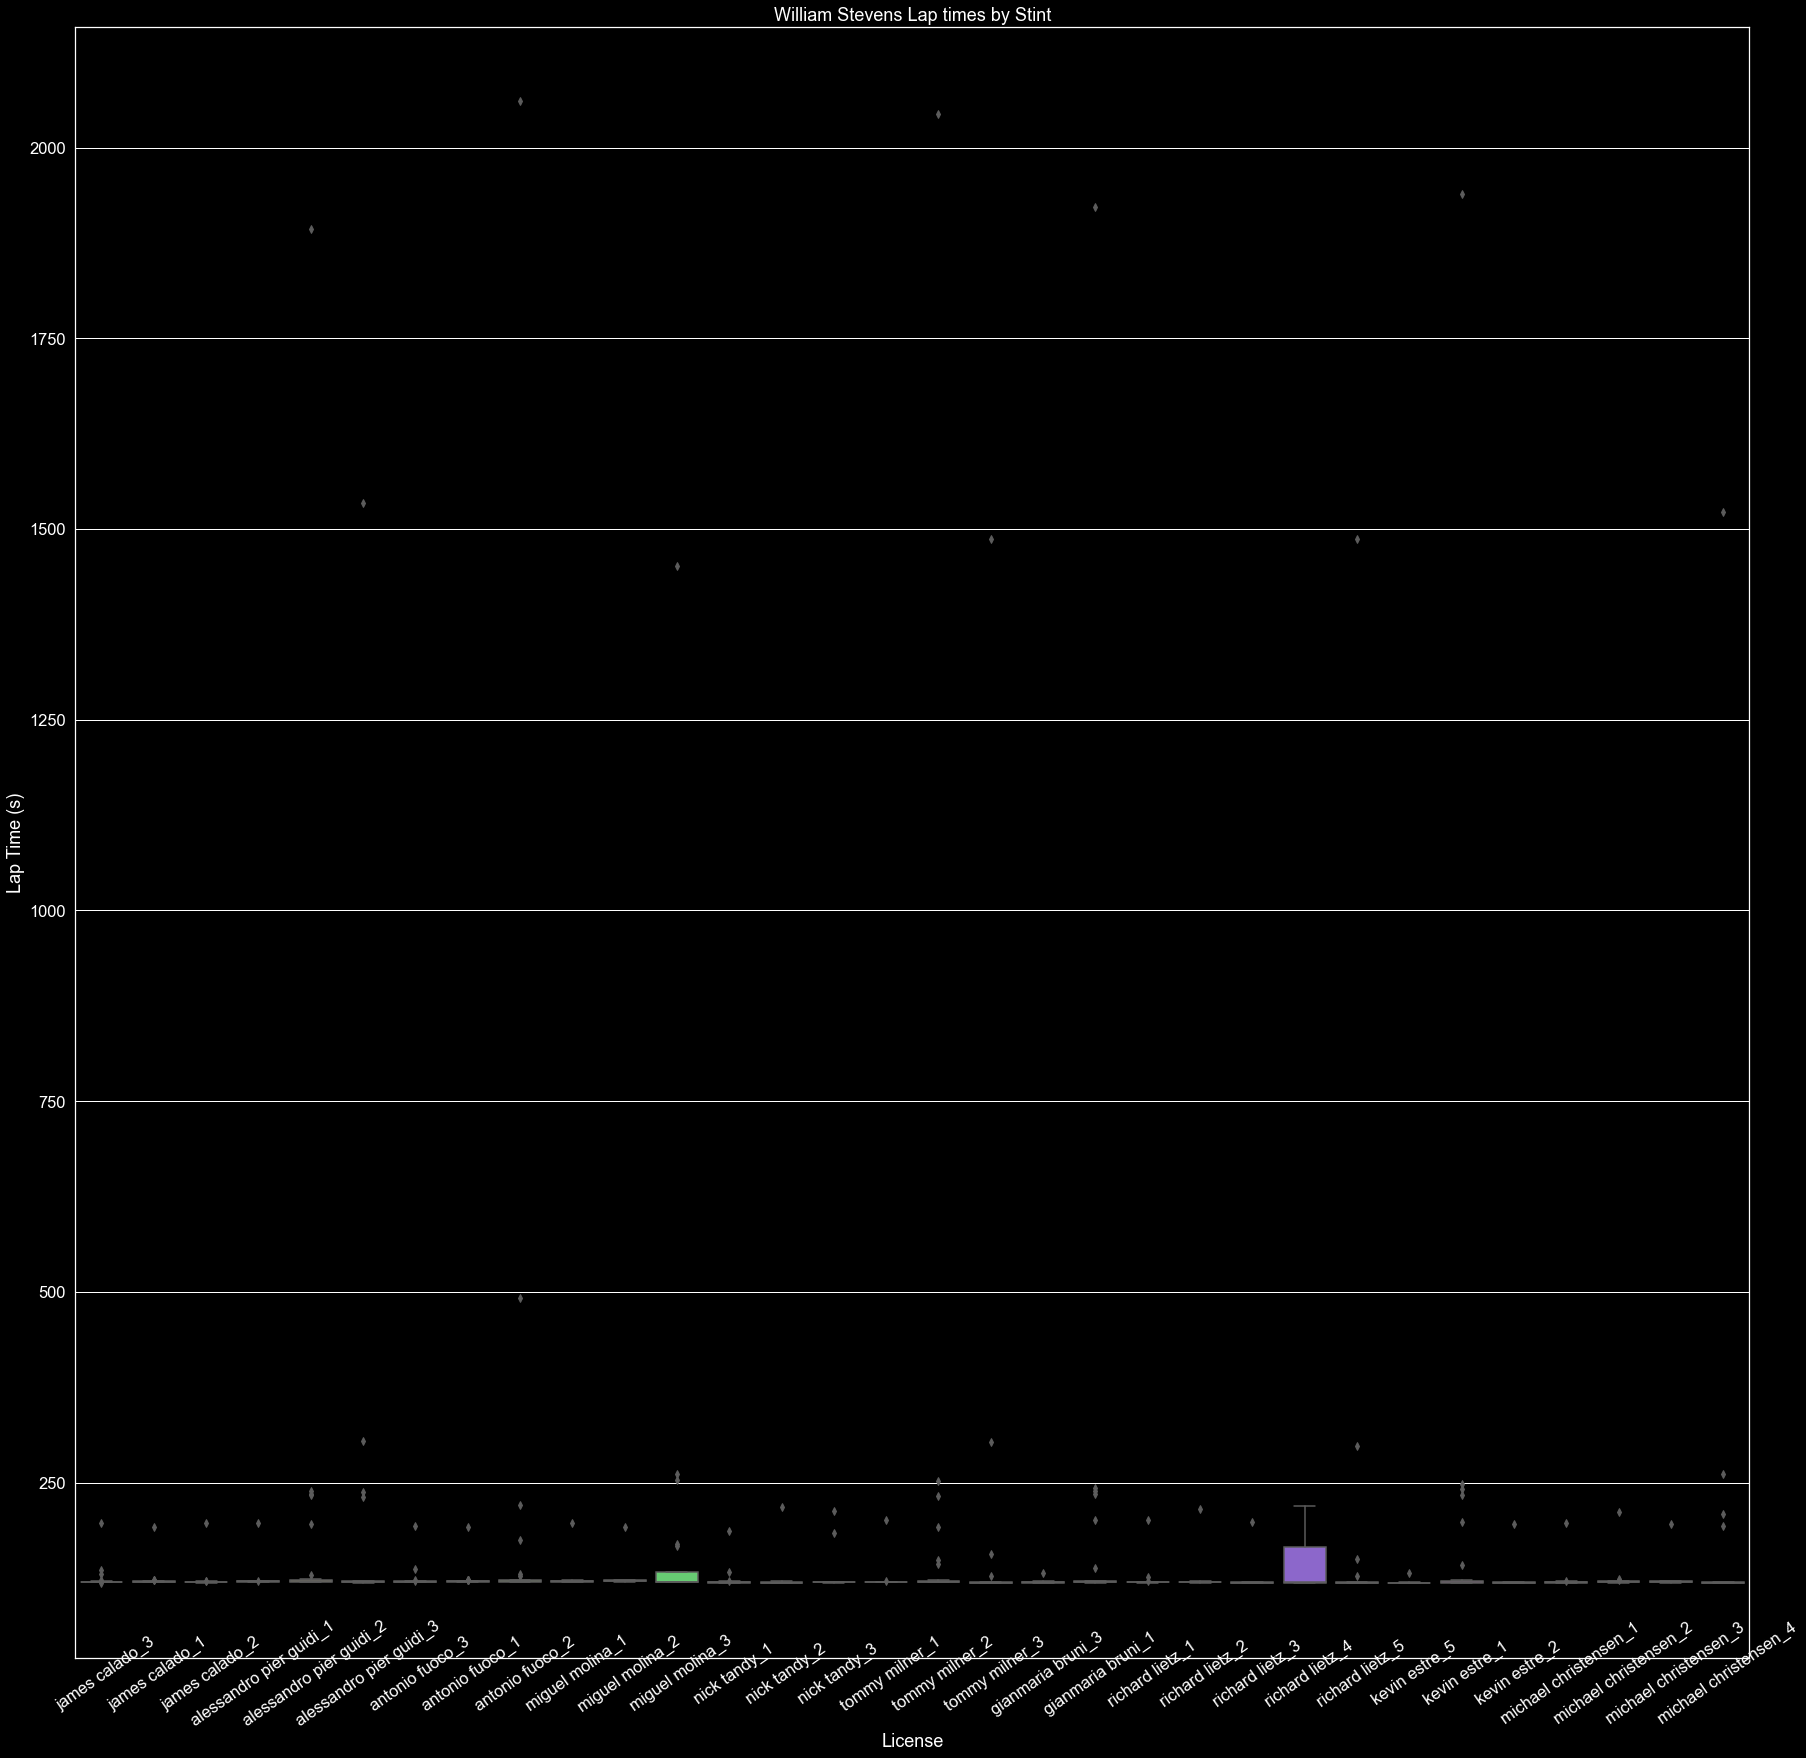

In [70]:
#now if we're looking at stints, we'd have to look at individual drivers now, otherwise we'll have toooo much data
sns.set(font_scale = 1.5, style = 'darkgrid', rc={'figure.figsize':(30,30)})
plt.style.use('dark_background')
ax11 = sns.boxplot(data = sebring_laps_william_stevens, x = 'driver_stint_no', y = 'lap_time_s', palette = "hls")
ax11.set_xticklabels(ax11.get_xticklabels(), rotation = 35,wrap = True)
ax11.set_title("William Stevens Lap times by Stint")
ax11.set_xlabel("License")
ax11.set_ylabel("Lap Time (s)") 